### evaluate

In [32]:
from stable_baselines3 import PPO
from geneEnv import geneEnv
from ratioEnv import ratioEnv
from flockEnv import flockEnv
from pig import pig


def evaluate(modelName,geneNum,generation_popul,episode_len,trained=True):

    model = PPO.load("result\\"+modelName+"\\trained_model_add.zip")


    with open("result\\"+modelName+"\\pigInfo.txt", "r") as f:
        code = f.read()
    # 읽어온 코드 실행
    exec(code)
    print("Evaluating")
    #env = model.get_env()
    env = geneEnv(geneNum,generation_popul,episode_len)
    #model.set_env(env)


    #check_env(env)
    
    if not trained:
        model = PPO("MlpPolicy", env, verbose=1,n_epochs=20)

    test = []
    for tt in range(5):
        obs, _ = env.reset()
        done = False

        episode_reward = 0
        while not done:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, done, _, info = env.step(action)
            episode_reward += reward
            #print(obs)
        print(episode_reward)
        test.append(episode_reward)
        
    print(sum(test)/len(test))

In [34]:
evaluate("TwoDise",2,32,5,trained=False)
print()
evaluate("TwoDise",2,32,5)
print()

evaluate("TwoDiseInverse",2,32,5,trained=False)
print()
evaluate("TwoDiseInverse",2,32,5)

Gene Environment setting success
Evaluating
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
234
247
262
203
222
233.6

Gene Environment setting success
Evaluating
276
292
305
278
292
288.6

Gene Environment setting success
Evaluating
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
47
128
88
130
52
89.0

Gene Environment setting success
Evaluating
236
317
318
293
289
290.6


# plotting

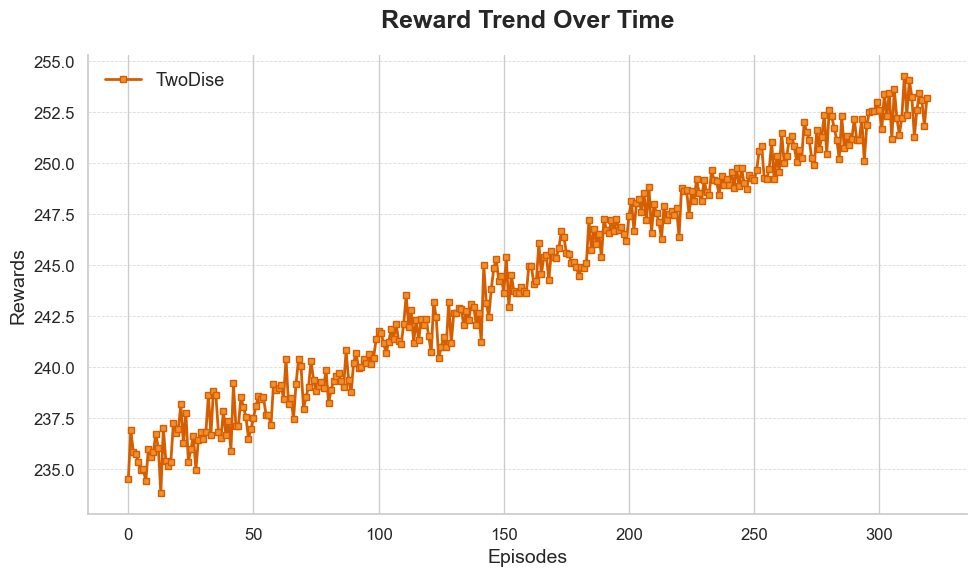

In [50]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt

def plotting(modelName,reduction=1000):
    

    folderPath = f'result/{modelName}/'

    f1 = open(folderPath+'monitor1.csv','r',encoding='UTF8')
    f11 = open(folderPath+'monitor.csv','r',encoding='UTF8')
    #f111 = open(folderPath+'monitor3.csv','r',encoding='UTF8')

    f = csv.reader(f1,delimiter=',')
    g = csv.reader(f11,delimiter=',')
    #h = csv.reader(f111,delimiter=',')
    next(f)
    next(f)
    next(f)
    next(g)
    next(g)
    next(g)
    # next(h)
    # next(h)
    # next(h)

    rewards = []
    for row in f:
        rewards.append(float(row[0]))
    for row in g:
        rewards.append(float(row[0]))
    # for row in h:
    #     rewards.append(float(row[0]))
        
        
    edited_rewards = []
    for i in range(0,len(rewards)-reduction,reduction):
        edited_rewards.append(sum(rewards[i:i+reduction])/reduction)



    sns.set(style="whitegrid", font_scale=1.2, rc={"lines.linewidth": 2})
    plt.figure(figsize=(10, 6))
    plt.plot(edited_rewards, color="#D55E00", label=modelName, linestyle='-', marker='s', markersize=4, markerfacecolor="#F28E2B")
    plt.title('Reward Trend Over Time', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Episodes', fontsize=14)
    plt.ylabel('Rewards', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.6, alpha=0.7)
    plt.legend(loc='best', frameon=False, fontsize=13)
    sns.despine()
    plt.tight_layout()

    plt.show()
    
plotting("TwoDise",1000)


In [1]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt

folderPath = 'result/TwoDise/'

f1 = open(folderPath+'monitor1.csv','r',encoding='UTF8')
f11 = open(folderPath+'monitor2.csv','r',encoding='UTF8')
f111 = open(folderPath+'monitor.csv','r',encoding='UTF8')

f = csv.reader(f1,delimiter=',')
g = csv.reader(f11,delimiter=',')
h = csv.reader(f111,delimiter=',')
for i in range(3):
    next(f1)
    next(f11)
    next(f111)

rewards_dise = []
for row in f:
    rewards_dise.append(float(row[0]))
for row in g:
    rewards_dise.append(float(row[0]))
for row in h:
    rewards_dise.append(float(row[0]))
    
    
edited_rewards_dise = []
for i in range(0,len(rewards_dise)-1000,1000):
    edited_rewards_dise.append(sum(rewards_dise[i:i+1000])/1000)





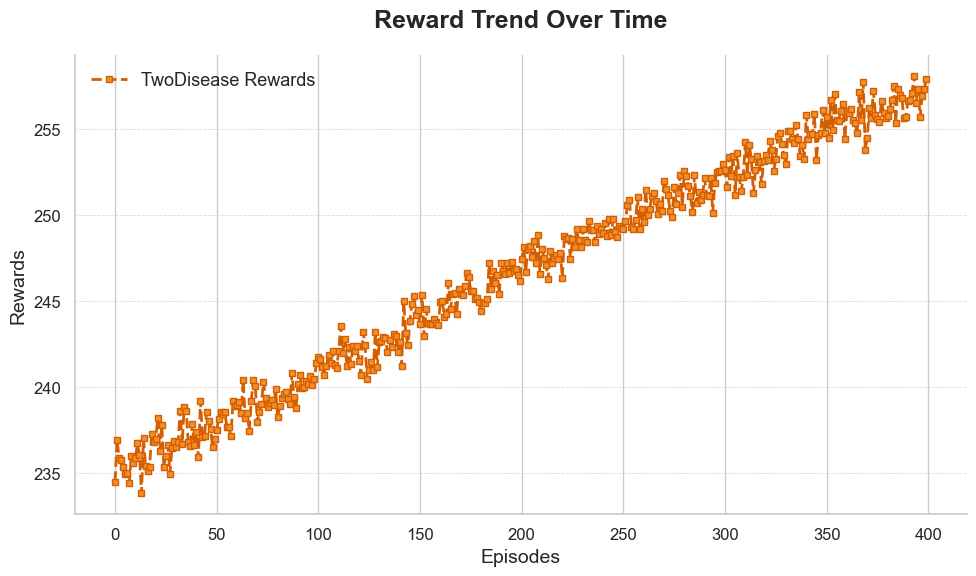

In [2]:
# Seaborn 스타일 설정 (모던하고 깔끔한 스타일로 설정)
sns.set(style="whitegrid", font_scale=1.2, rc={"lines.linewidth": 2})
plt.figure(figsize=(10, 6))
plt.plot(edited_rewards_dise, color="#D55E00", label='TwoDisease Rewards', linestyle='--', marker='s', markersize=4, markerfacecolor="#F28E2B")
plt.title('Reward Trend Over Time', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Rewards', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.6, alpha=0.7)
plt.legend(loc='best', frameon=False, fontsize=13)
sns.despine()
plt.tight_layout()

# 그래프 출력
plt.show()

In [4]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt

folderPath = 'result/TwoDiseInverse/'

f1 = open(folderPath+'monitor1.csv','r',encoding='UTF8')
f11 = open(folderPath+'monitor2.csv','r',encoding='UTF8')
f111 = open(folderPath+'monitor.csv','r',encoding='UTF8')

f = csv.reader(f1,delimiter=',')
g = csv.reader(f11,delimiter=',')
h = csv.reader(f111,delimiter=',')
for i in range(3):
    next(f1)
    next(f11)
    next(f111)

rewards_inv = []
for row in f:
    rewards_inv.append(float(row[0]))
for row in g:
    rewards_inv.append(float(row[0]))
for row in h:
    rewards_inv.append(float(row[0]))
    
edited_rewards_inv = []
for i in range(0,len(rewards_inv)-1000,1000):
    edited_rewards_inv.append(sum(rewards_inv[i:i+1000])/1000)





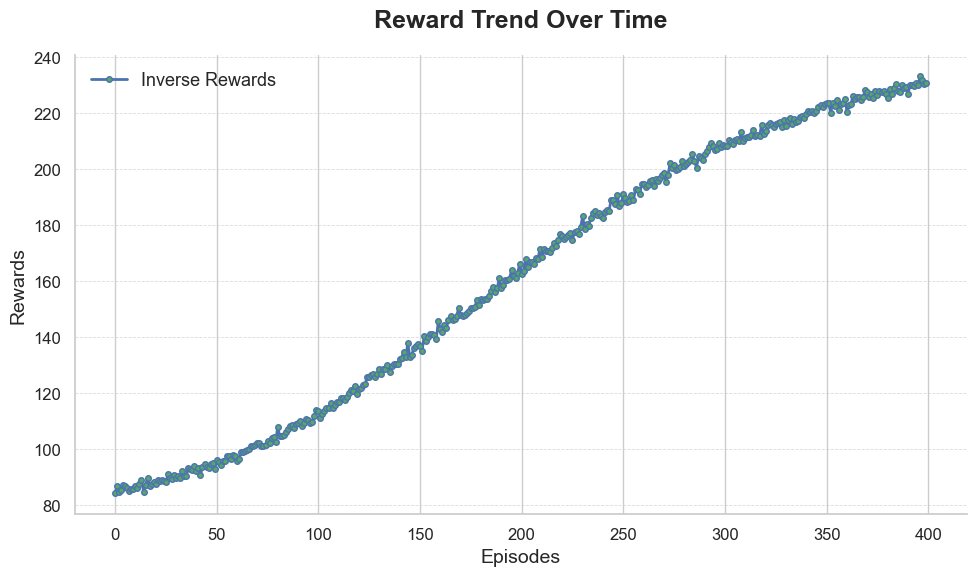

In [5]:
sns.set(style="whitegrid", font_scale=1.2, rc={"lines.linewidth": 2})
plt.figure(figsize=(10, 6))
plt.plot(edited_rewards_inv, color="#4C72B0", label='Inverse Rewards', linestyle='-', marker='o', markersize=4, markerfacecolor="#55A868")
plt.title('Reward Trend Over Time', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Rewards', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.6, alpha=0.7)
plt.legend(loc='best', frameon=False, fontsize=13)
sns.despine()
plt.tight_layout()

plt.show()

In [6]:
diseStart = sum(edited_rewards_dise[:10])/len(edited_rewards_dise[:10])
diseEnd = sum(edited_rewards_dise[-10:])/len(edited_rewards_dise[-10:])
invStart = sum(edited_rewards_inv[:10])/len(edited_rewards_inv[:10])
invEnd = sum(edited_rewards_inv[-10:])/len(edited_rewards_inv[-10:])

print(f"dise start : {diseStart:.3f}")
print(f"dise end : {diseEnd:.3f}")
print(f"inv start : {invStart:.3f}")
print(f"inv end : {invEnd:.3f}")


dise start : 235.428
dise end : 257.017
inv start : 85.754
inv end : 230.334


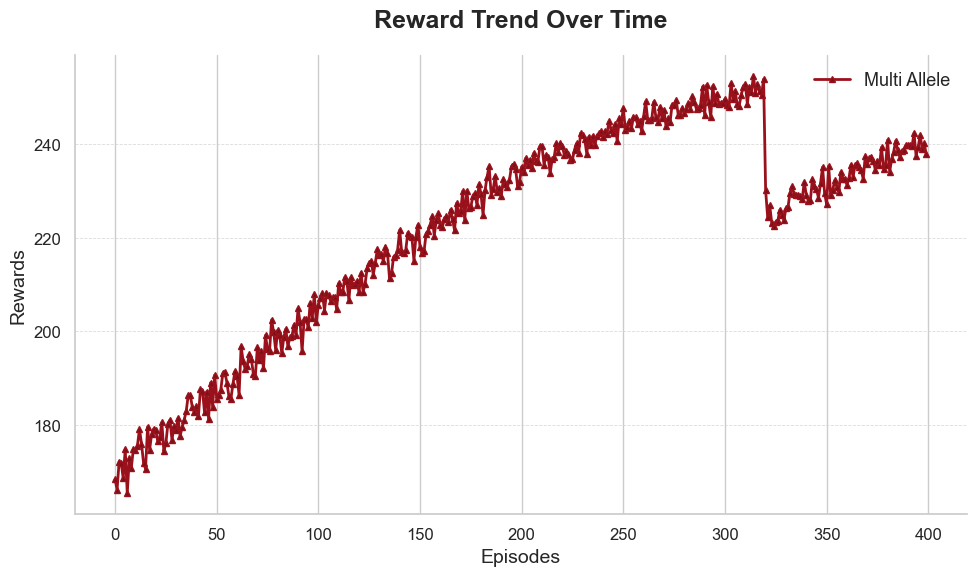

In [7]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt

folderPath = 'result/MultiAlle/'

f1 = open(folderPath+'monitor1.csv','r',encoding='UTF8')
f11 = open(folderPath+'monitor2.csv','r',encoding='UTF8')
f111 = open(folderPath+'monitor.csv','r',encoding='UTF8')

f = csv.reader(f1,delimiter=',')
g = csv.reader(f11,delimiter=',')
h = csv.reader(f111,delimiter=',')
for i in range(3):
    next(f1)
    next(f11)
    next(f111)

rewards_multi = []
for row in f:
    rewards_multi.append(float(row[0]))
for row in g:
    rewards_multi.append(float(row[0]))
for row in h:
    rewards_multi.append(float(row[0]))
    
    
edited_rewards_multi = []
for i in range(0,len(rewards_multi)-500,500):
    edited_rewards_multi.append(sum(rewards_multi[i:i+500])/500)



sns.set(style="whitegrid", font_scale=1.2, rc={"lines.linewidth": 2})
plt.figure(figsize=(10, 6))
plt.plot(edited_rewards_multi, color="#9B111B", label='Multi Allele', linestyle='-', marker='^', markersize=4, markerfacecolor="#79111A")
plt.title('Reward Trend Over Time', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Rewards', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.6, alpha=0.7)
plt.legend(loc='best', frameon=False, fontsize=13)
sns.despine()
plt.tight_layout()

plt.show()

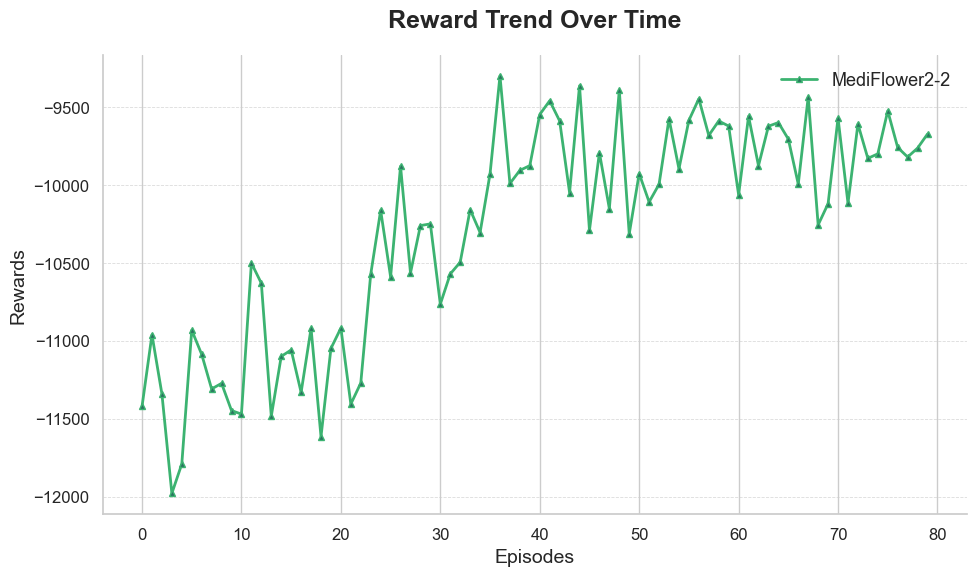

In [3]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt

folderPath = 'result/MediFlower2-2/'

f1 = open(folderPath+'monitor1.csv','r',encoding='UTF8')
f11 = open(folderPath+'monitor.csv','r',encoding='UTF8')

f = csv.reader(f1,delimiter=',')
g = csv.reader(f11,delimiter=',')
next(f)
next(f)
next(f)
next(g)
next(g)
next(g)

rewards_medi = []
for row in f:
    rewards_medi.append(float(row[0]))
for row in g:
    rewards_medi.append(float(row[0]))
    
    
edited_rewards_medi = []
for i in range(0,len(rewards_medi)-1000,1000):
    edited_rewards_medi.append(sum(rewards_medi[i:i+1000])/1000)



sns.set(style="whitegrid", font_scale=1.2, rc={"lines.linewidth": 2})
plt.figure(figsize=(10, 6))
plt.plot(edited_rewards_medi, color="#3CB371", label='MediFlower2-2', linestyle='-', marker='^', markersize=4, markerfacecolor="#2B7260")
plt.title('Reward Trend Over Time', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Rewards', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.6, alpha=0.7)
plt.legend(loc='best', frameon=False, fontsize=13)
sns.despine()
plt.tight_layout()

plt.show()